<a href="https://colab.research.google.com/github/ganesh3/opencv-work/blob/main/opencv_augmented_reality_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AprilTag Detection

In [1]:
!pip install apriltag

     |████████████████████████████████| 201 kB 13.0 MB/s 
  Created wheel for apriltag: filename=apriltag-0.0.16-cp37-cp37m-linux_x86_64.whl size=556578 sha256=c87bd1dbf0ee21e8768817bacf1548ee44631120b584b6e95ff56951bea9eeb0
  Stored in directory: /root/.cache/pip/wheels/83/29/7f/e1690d95bf4c49d9e767fc1534853e010594256a8a177ac8dd
Successfully built apriltag


In [2]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/python-apriltag/python-apriltag.zip
!unzip -qq python-apriltag.zip
%cd python-apriltag

--2022-01-14 10:58:18--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/python-apriltag/python-apriltag.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.137.113
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.137.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978333 (955K) [application/zip]
Saving to: ‘python-apriltag.zip’

python-apriltag.zip 100%[===================>] 955.40K  1.17MB/s    in 0.8s    

2022-01-14 10:58:20 (1.17 MB/s) - ‘python-apriltag.zip’ saved [978333/978333]

/content/python-apriltag


In [3]:
# import the necessary packages
import matplotlib.pyplot as plt
import apriltag
import argparse
import cv2

In [4]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [5]:
args = {
	"image": "images/example_02.png"
}

In [7]:
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [9]:
# define the AprilTags detector options and then detect the AprilTags in the input image
print("[INFO] detecting AprilTags...")
options = apriltag.DetectorOptions(families="tag36h11")
detector = apriltag.Detector(options)
results = detector.detect(gray)
print("[INFO] {} total AprilTags detected".format(len(results)))

[INFO] detecting AprilTags...
[INFO] 5 total AprilTags detected


In [12]:
type(results), results

(list,
 [Detection(tag_family=b'tag36h11', tag_id=3, hamming=0, goodness=0.0, decision_margin=83.47013854980469, homography=array([[ 9.04705678e-01,  1.70446971e+00, -2.56469147e+01],
       [-2.74898765e-01,  5.13382059e-01, -1.24367059e+01],
       [ 2.47142075e-03,  2.80454022e-03, -7.19309643e-02]]), center=array([356.54901759, 172.89780581]), corners=array([[365.97869873, 164.17166138],
       [365.97265625, 183.00912476],
       [345.6265564 , 183.00535583],
       [347.03768921, 162.69239807]])),
  Detection(tag_family=b'tag36h11', tag_id=5, hamming=0, goodness=0.0, decision_margin=80.76527404785156, homography=array([[ 6.87269092e-02,  5.50293998e-01, -1.94952998e+01],
       [-6.90689464e-01, -5.24305664e-02, -1.10897099e+01],
       [ 3.04640740e-05, -3.36262277e-04, -4.08432706e-02]]), center=array([477.3197518, 271.5186541]), corners=array([[496.1907959 , 255.23519897],
       [493.54180908, 289.74728394],
       [458.72918701, 287.56008911],
       [461.38641357, 253.61445

In [13]:
for r in results:
  # extract the bounding box (x, y)-coordinates for the AprilTag and convert each of the (x, y)-coordinate pairs to integers
  (ptA, ptB, ptC, ptD) = r.corners
  ptA = (int(ptA[0]), int(ptA[1]))
  ptB = (int(ptB[0]), int(ptB[1]))
  ptC = (int(ptC[0]), int(ptC[1]))
  ptD = (int(ptD[0]), int(ptD[1]))

  # draw the bounding box of the AprilTag detection
  cv2.line(image, ptA, ptB, (0, 0, 255), 4)
  cv2.line(image, ptB, ptC, (0, 0, 255), 4)
  cv2.line(image, ptC, ptD, (0, 0, 255), 4)
  cv2.line(image, ptD, ptA, (0, 0, 255), 4)

  # draw the center (x, y)-coordinates of the AprilTag
  (cX, cY) = int(r.center[0]), int(r.center[1])
  cv2.circle(image, (cX, cY), 5, (0, 255, 0), -1)

  # draw the tag family on the image
  tagFamily = r.tag_family.decode("utf-8")
  cv2.putText(image, tagFamily, (ptA[0], ptA[1]-15), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255), 2)
  print("[INFO] tag family: {}".format(tagFamily))

[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11


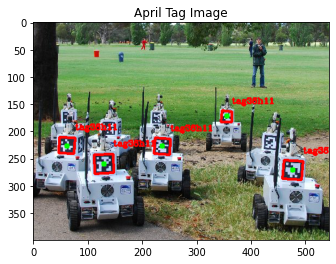

In [14]:
plt_imshow("April Tag Image", image)

### Generating ArUco Markers with OpenCV